<a href="https://colab.research.google.com/github/vilmarprado/mack_ling_prog_cie_dados/blob/main/LP_T7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">

<br>
<br>

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1>
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1>

# Exercício T7


### Vilmar Prado do Nascimento

<br>
<br>

---


# Analise dados sobre desenvolvimento



<img src="https://www.gapminder.org/wp-content/themes/gapminder2/images/gapminder-logo.svg" width=300>  



Aqui você vai empregar uma base de dados da [gapminder](https://www.gapminder.org/) com informações de vários índices de desenvolvimento dos países ao longo do tempo. Empregue esses dados, e o que você aprendeu sobre `R` para implementar uma análise desses dados de desenvolvimento trazendo *insights* relevantes sobre esse tema, a exemplo do que você fez na atividade anterior em `Python`.



Empregue a base `gapminder` a seguir e **implemente**:

* **Ao menos duas visualizações de dados (gráficos)**

que tragam *insights* valiosos e relevantes sobre o desenvolvimento dos países. **Para cada uma faça um pequeno parágrafo, 4-5 linhas, compartilhando sua análise e conclusões**.

In [1]:
# ESTE É UM NOTEBOOK EM R

data = read.csv('https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/raw/main/data/Life_Expectancy_Data.csv')
head(data)

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


## Referências úteis para este Lab

Você pode acessar soluções na internet, mas tenha certeza de que os códigos que encontrar façam sentido para você.

Você também pode achar útil e fácil consultar, além das notas de aula as seguintes referências:

* [Quick-R](https://www.statmethods.net/)
* [R Tutorial](https://www.r-tutor.com/)
* [R for Data Science](https://r4ds.had.co.nz/)


# Seu Código aqui.

In [48]:
# Seu código
install.packages("installr")
library(installr)
library(dplyr)
library(ggplot2)
library("scales")
str(data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	2938 obs. of  22 variables:
 $ Country                        : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                           : int  2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 ...
 $ Status                         : chr  "Developing" "Developing" "Developing" "Developing" ...
 $ Life.expectancy                : num  65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...
 $ Adult.Mortality                : num  263 271 268 272 275 279 281 287 295 295 ...
 $ infant.deaths                  : int  62 64 66 69 71 74 77 80 82 84 ...
 $ Alcohol                        : num  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.03 0.02 0.03 ...
 $ percentage.expenditure         : num  71.3 73.5 73.2 78.2 7.1 ...
 $ Hepatitis.B                    : num  65 62 64 67 68 66 63 64 63 64 ...
 $ Measles                        : int  1154 492 430 2787 3013 1989 2861 1599 1141 1990 ...
 $ BMI                            : num  19.1 18.6 18.1 17.6 17.2 16.7 16.2 15.7

In [80]:
# ,'Saudi Arabia', 'Argentina', 'Egypt', 'United Arab Emirates', 'Ethiopia','Iran'
df_paises_pesquisados<-c('Brazil', 'China', 'India','South Africa','Russia')
df_paises<-data%>%
           filter(Country%in%df_paises_pesquisados) %>%
           select(Country, Year, Status, Life.expectancy, Adult.Mortality, infant.deaths, Alcohol, Schooling, GDP, Population)%>%
           mutate(Proporcao_Morte_Adulto = Adult.Mortality/10000)  %>%
           mutate(Proporcao_Morte_Infantil = infant.deaths/10000)

print(df_paises_pesquisados)
#print(df_paises)


[1] "Brazil"       "China"        "India"        "South Africa" "Russia"      
        Country Year     Status Life.expectancy Adult.Mortality infant.deaths
1        Brazil 2015 Developing            75.0             142            42
2        Brazil 2014 Developing            74.8             144            44
3        Brazil 2013 Developing            74.7             146            46
4        Brazil 2012 Developing            74.5             148            49
5        Brazil 2011 Developing            74.1             152            51
6        Brazil 2010 Developing            73.8             154            54
7        Brazil 2009 Developing            73.6             157            57
8        Brazil 2008 Developing            73.4             158            61
9        Brazil 2007 Developing            73.3             159            65
10       Brazil 2006 Developing            73.0             161            70
11       Brazil 2005 Developing            72.7             163

In [81]:

# replacing NA values in data frame
df_paises[is.na(df_paises)] = 0
#print(df_paises)

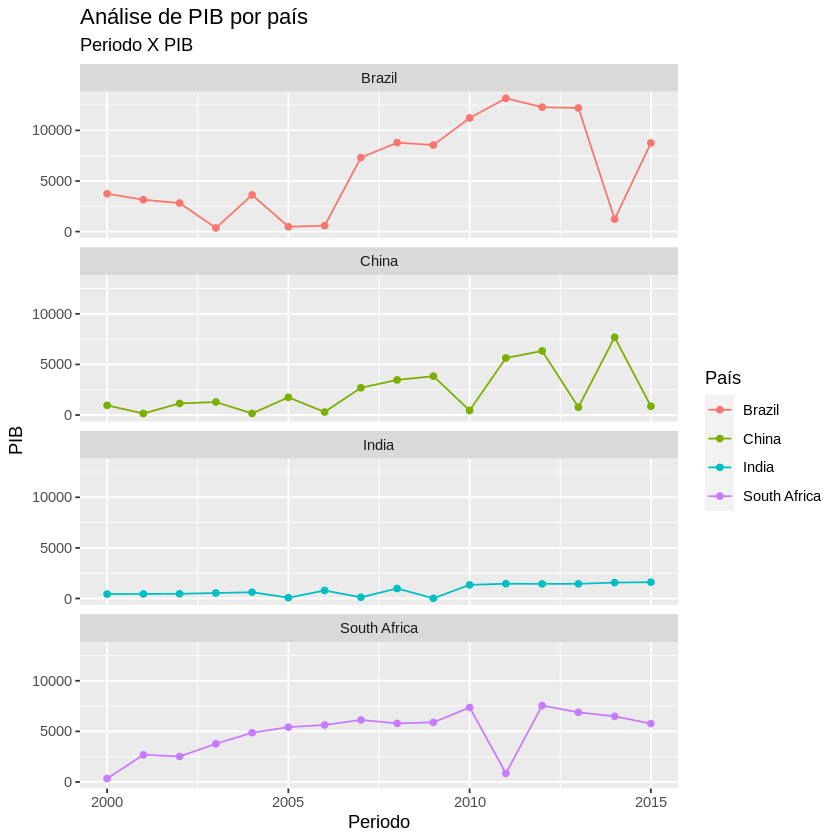

In [84]:
  ggplot(df_paises) +
  geom_point(aes(x = Year, y = GDP, group = Country, col = Country))+
  geom_line(aes(x = Year, y = GDP, group = Country, col = Country))+
  ggtitle("Análise de PIB por país", subtitle="Periodo X PIB") +
  xlab("Periodo") +
  ylab("PIB") +
  scale_color_discrete(name = "País")+
 facet_wrap(~Country, nrow = 5)

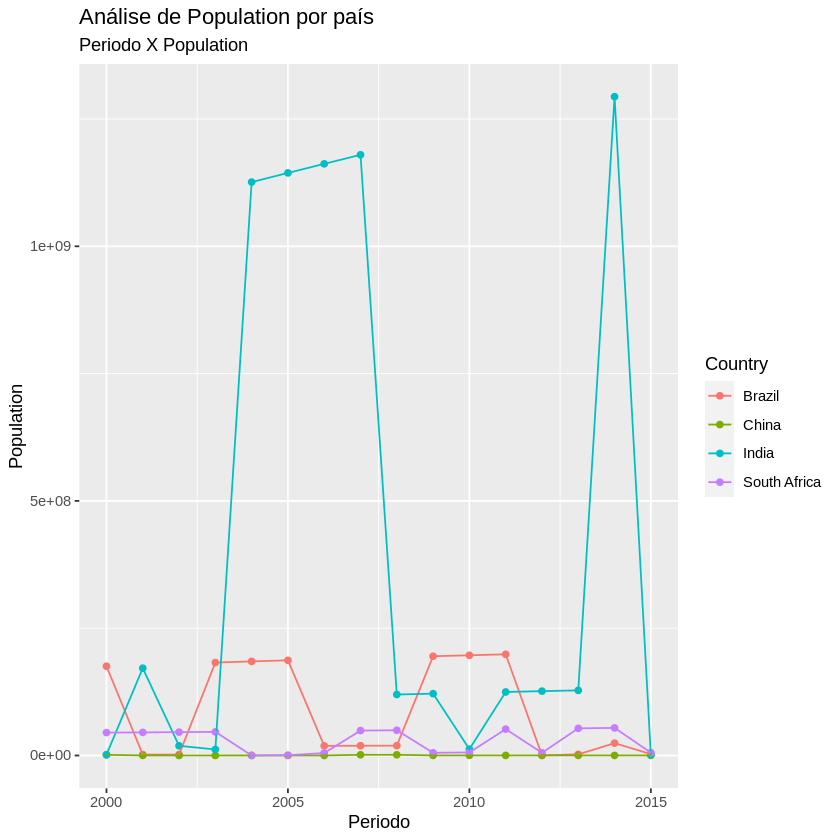

In [86]:
ggplot(df_paises) +
  geom_point(aes(x = Year, y = Population, group = Country, col = Country))+
  geom_line(aes(x = Year, y = Population, group = Country, col = Country))+
  ggtitle("Análise de Population por país", subtitle="Periodo X Population") +
  xlab("Periodo") +
  ylab("Population")

Warning message:
“Using size for a discrete variable is not advised.”


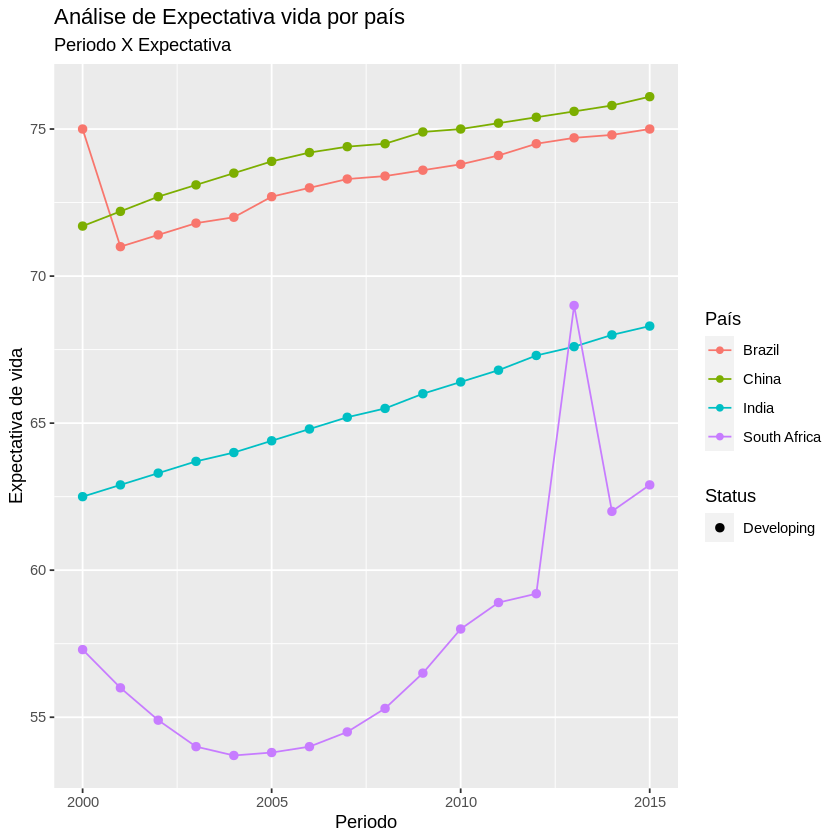

In [35]:
  ggplot(df_paises) +
  geom_line(aes(x = Year, y = Life.expectancy, group = Country, col = Country))+
  geom_point(aes(x = Year, y = Life.expectancy, group = Country, col = Country, size = Status))+
  ggtitle("Análise de Expectativa vida por país", subtitle="Periodo X Expectativa") +
  xlab("Periodo") +
  ylab("Expectativa de vida") +
  scale_color_discrete(name = "País")

Warning message:
“Using size for a discrete variable is not advised.”


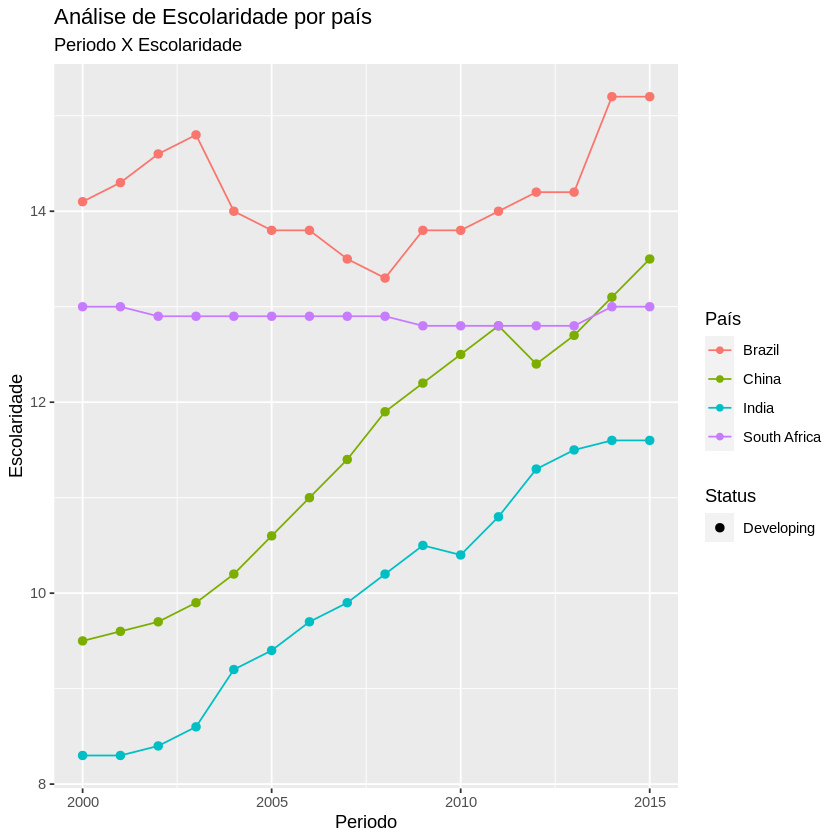

In [36]:
  ggplot(df_paises) +
  geom_line(aes(x = Year, y = Schooling, group = Country, col = Country))+
  geom_point(aes(x = Year, y = Schooling, group = Country, col = Country, size = Status))+
  ggtitle("Análise de Escolaridade por país", subtitle="Periodo X Escolaridade") +
  xlab("Periodo") +
  ylab("Escolaridade") +
  scale_color_discrete(name = "País")


Warning message:
“Using size for a discrete variable is not advised.”


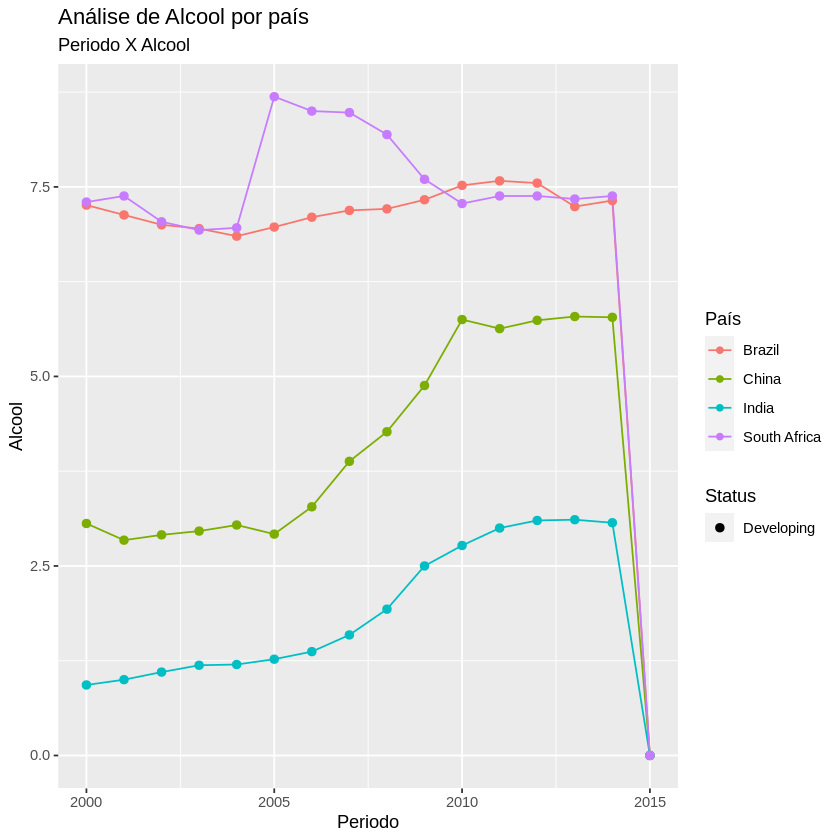

In [37]:
  ggplot(df_paises) +
  geom_line(aes(x = Year, y = Alcohol, group = Country, col = Country))+
  geom_point(aes(x = Year, y = Alcohol, group = Country, col = Country, size = Status))+
  ggtitle("Análise de Alcool por país", subtitle="Periodo X Alcool") +
  xlab("Periodo") +
  ylab("Alcool") +
  scale_color_discrete(name = "País")


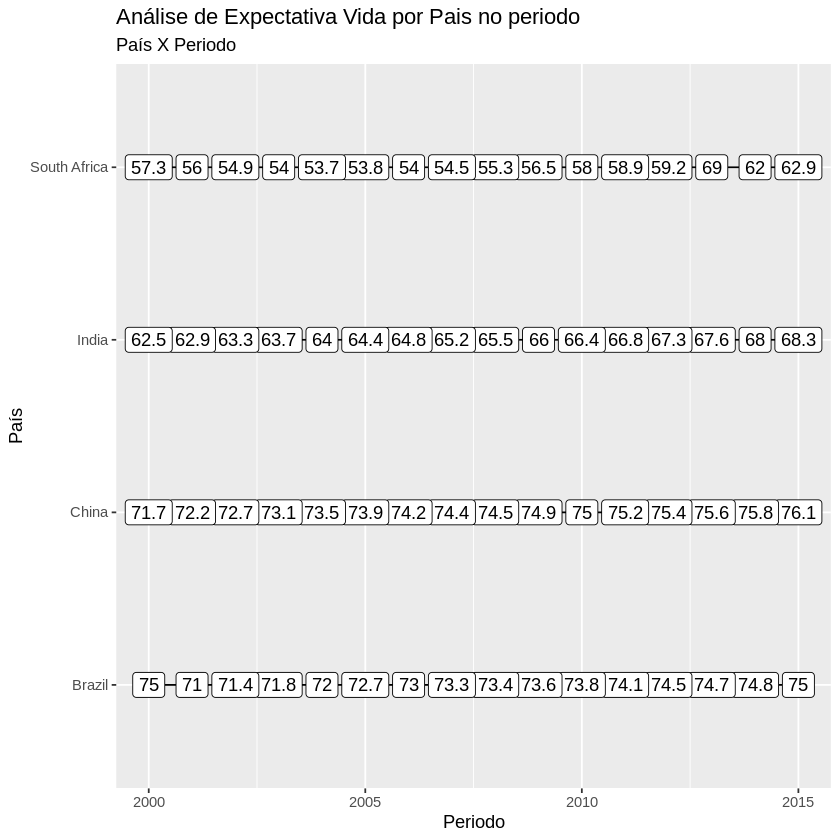

In [38]:
  ggplot(df_paises) +
  geom_line(aes(x = Year, y = Country))+
  geom_label(aes(x = Year, y =  Country, label=Life.expectancy))+
  ggtitle("Análise de Expectativa Vida por Pais no periodo", subtitle="País X Periodo") +
  xlab("Periodo") +
  ylab("País")

Warning message:
“Using size for a discrete variable is not advised.”


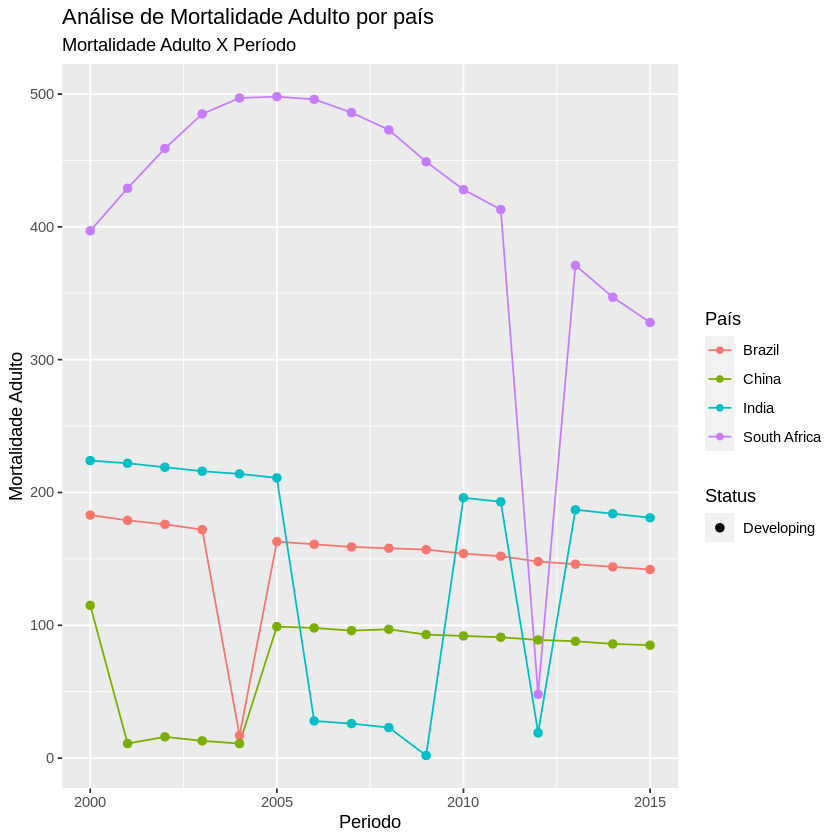

In [39]:
  ggplot(df_paises) +
  geom_line(aes(x = Year, y = Adult.Mortality, group = Country, col = Country))+
  geom_point(aes(x = Year, y = Adult.Mortality, group = Country, col = Country, size = Status))+
  ggtitle("Análise de Mortalidade Adulto por país", subtitle="Mortalidade Adulto X Período") +
  xlab("Periodo") +
  ylab("Mortalidade Adulto")+
  scale_color_discrete(name = "País")

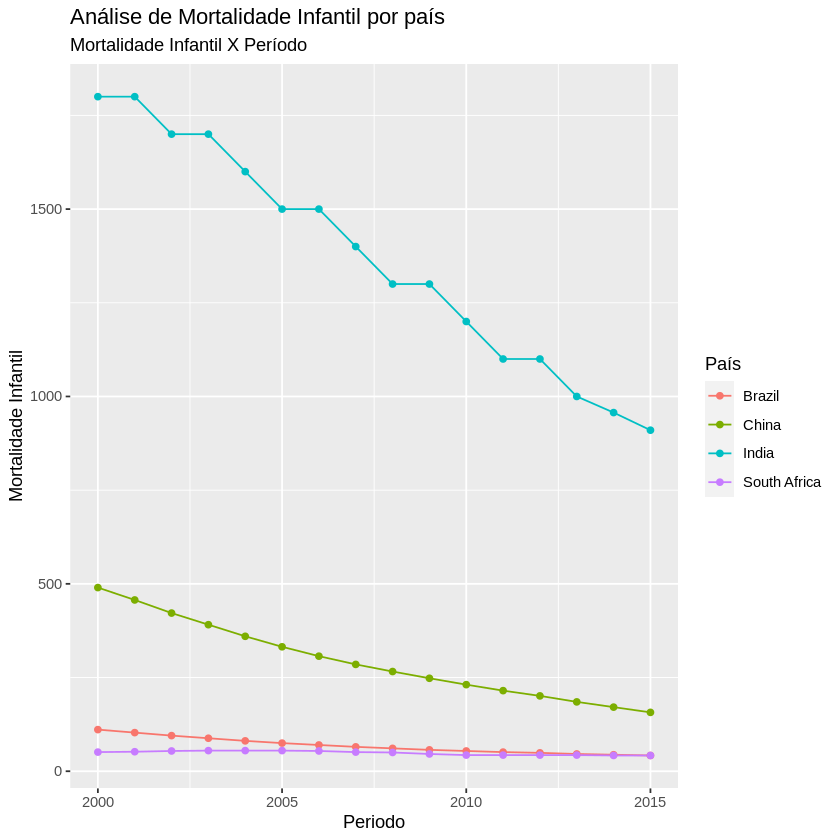

In [40]:
  ggplot(df_paises) +
  geom_line(aes(x = Year, y = infant.deaths, group = Country, col = Country))+
  geom_point(aes(x = Year, y = infant.deaths, group  = Country, col = Country)) +
    scale_color_discrete(name = "País")+
    ggtitle("Análise de Mortalidade Infantil por país", subtitle="Mortalidade Infantil X Período") +
  xlab("Periodo") +
  ylab("Mortalidade Infantil")

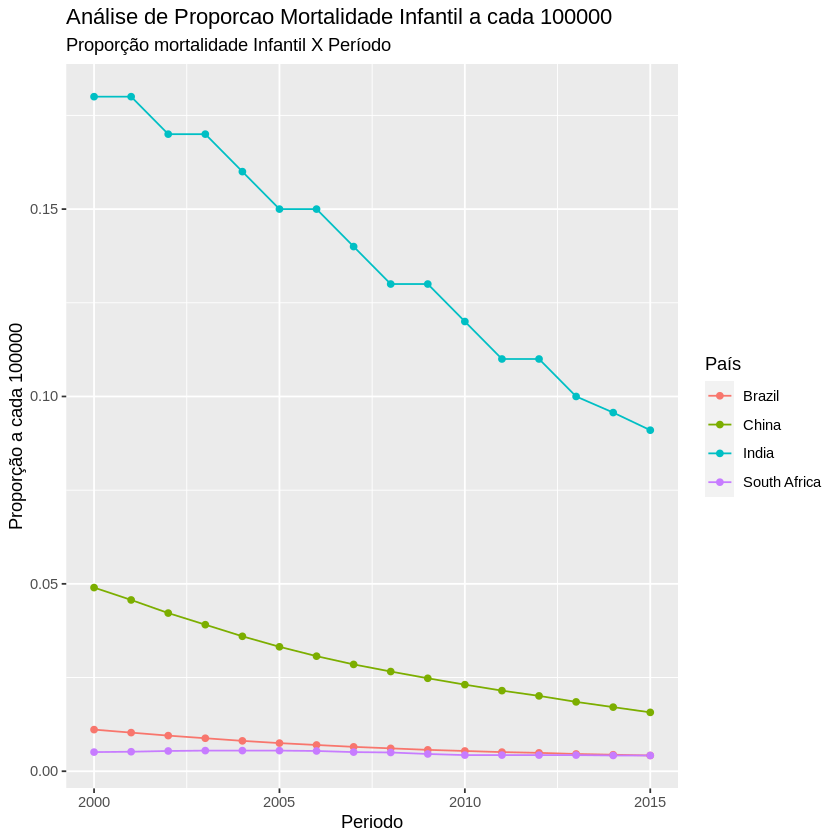

In [82]:
  ggplot(df_paises) +
  geom_line(aes(x = Year, y = Proporcao_Morte_Infantil, group = Country, col = Country))+
  geom_point(aes(x = Year, y = Proporcao_Morte_Infantil, group  = Country, col = Country)) +
    scale_color_discrete(name = "País")+
    ggtitle("Análise de Proporcao Mortalidade Infantil a cada 10.000", subtitle="Proporção mortalidade Infantil X Período") +
  xlab("Periodo") +
  ylab("Proporção a cada 10.000")

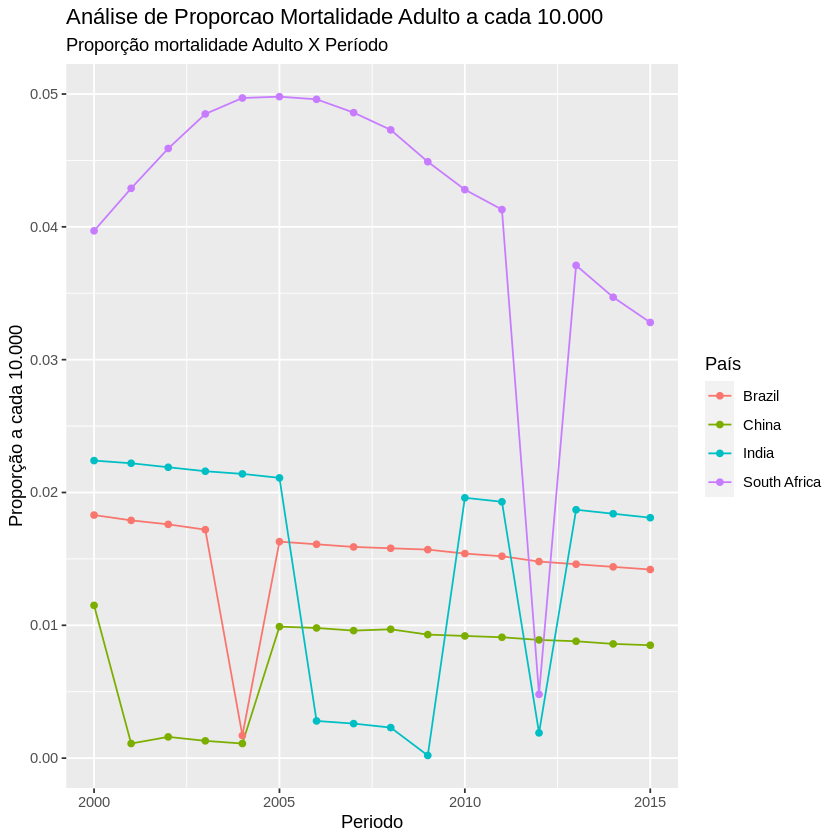

In [83]:
  ggplot(df_paises) +
  geom_line(aes(x = Year, y = Proporcao_Morte_Adulto , group = Country, col = Country))+
  geom_point(aes(x = Year, y = Proporcao_Morte_Adulto, group  = Country, col = Country)) +
    scale_color_discrete(name = "País")+
    ggtitle("Análise de Proporcao Mortalidade Adulto a cada 10.000", subtitle="Proporção mortalidade Adulto X Período") +
  xlab("Periodo") +
  ylab("Proporção a cada 10.000")